## LSTM-ED for Anomaly Detection in Time Series Data

In [1]:

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from dataset import *
from plots import *
from metrics import *
from models_funtions import *

# Set style for matplotlib
plt.style.use("Solarize_Light2")

In [2]:
# Path to the root directory of the dataset
ROOTDIR_DATASET_NORMAL =  '../dataset/normal'
ROOTDIR_DATASET_ANOMALY = '../dataset/collisions'

# TF_ENABLE_ONEDNN_OPTS=0 means that the model will not use the oneDNN library for optimization

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

#### Variours parameters

In [3]:
#freq = '1.0'
freq = '0.1'
#freq = '0.01'
#freq = '0.005'

file_name_normal = "_20220811_rbtc_"
file_name_collisions = "_collision_20220811_rbtc_"

recording_normal = [0, 2, 3, 4]
recording_collisions = [1, 5]

features_folder_normal = "../features/normal/"
features_folder_collisions = "../features/collisions/"

### Data

In [4]:
df_features_normal, df_normal_raw, _ = get_dataframes(ROOTDIR_DATASET_NORMAL, file_name_normal, recording_normal, freq, f"{features_folder_normal}")
df_features_collisions, df_collisions_raw, df_collisions_raw_action = get_dataframes(ROOTDIR_DATASET_ANOMALY, file_name_collisions, recording_collisions, freq, f"{features_folder_collisions}1_5/")
df_features_collisions_1, df_collisions_raw_1, df_collisions_raw_action_1 = get_dataframes(ROOTDIR_DATASET_ANOMALY, file_name_collisions, [1], freq, f"{features_folder_collisions}1/")
df_features_collisions_5, df_collisions_raw_5, df_collisions_raw_action_5 = get_dataframes(ROOTDIR_DATASET_ANOMALY, file_name_collisions, [5], freq, f"{features_folder_collisions}5/")

Loading data.
Found 31 different actions.
Loading data done.

Loading features from file.
--- 2.402529716491699 seconds ---
Loading data.
Found 31 different actions.
Loading data done.

Loading features from file.
--- 0.014230966567993164 seconds ---
Loading data.
Found 31 different actions.
Loading data done.

Loading features from file.
--- 0.013747215270996094 seconds ---
Loading data.
Found 31 different actions.
Loading data done.

Loading features from file.
--- 0.012076139450073242 seconds ---


In [5]:
X_train, y_train, X_test, y_test, df_test = get_train_test_data(df_features_normal, df_features_collisions, full_normal=True)
X_train_1, y_train_1, X_test_1, y_test_1, df_test_1 = get_train_test_data(df_features_normal, df_features_collisions_1, full_normal=True)
X_train_5, y_train_5, X_test_5, y_test_5, df_test_5 = get_train_test_data(df_features_normal, df_features_collisions_5, full_normal=True)

c:\Users\VG User\Documents\GitHub\MLinAPP-FP01-14\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(
c:\Users\VG User\Documents\GitHub\MLinAPP-FP01-14\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(
c:\Users\VG User\Documents\GitHub\MLinAPP-FP01-14\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(


### Collisions

In [6]:
collisions_rec1, collisions_init1 = get_collisions('1', ROOTDIR_DATASET_ANOMALY)
collisions_rec5, collisions_init5 = get_collisions('5', ROOTDIR_DATASET_ANOMALY)

# Merge the collisions of the two recordings in one dataframe
collisions_rec = pd.concat([collisions_rec1, collisions_rec5])
collisions_init = pd.concat([collisions_init1, collisions_init5])

In [7]:
collisions_zones, y_collisions = get_collisions_zones_and_labels(collisions_rec, collisions_init, df_features_collisions)
collisions_zones_1, y_collisions_1 = get_collisions_zones_and_labels(collisions_rec1, collisions_init1, df_features_collisions_1)
collisions_zones_5, y_collisions_5 = get_collisions_zones_and_labels(collisions_rec5, collisions_init5, df_features_collisions_5)

## LSTM-ED for Anomaly Detection in Time Series Data

In [8]:
from algorithms.lstm_enc_dec_axl import LSTMED

classifier = LSTMED(
    name='LSTM-ED',
    num_epochs=50,
    batch_size=64,
    lr=1e-3,
    hidden_size=64,
    sequence_length=100,
    train_gaussian_percentage=0.30,
    n_layers=(2, 2),
    use_bias=(True, True),
    dropout=(0.1, 0.1),
    seed=42,
    gpu=None,              # Set to None for CPU, or specify GPU index if available
    details=True
)
# Train the LSTM on normal data
classifier.fit(X_train)
print("LSTM-ED training completed.")


  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\VG User\Documents\GitHub\MLinAPP-FP01-14\.venv\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
100%|██████████| 50/50 [01:25<00:00,  1.72s/it]
c:\Users\VG User\Documents\GitHub\MLinAPP-FP01-14\.venv\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


LSTM-ED training completed.


### Predictions

Anomaly prediction completed.
Number of anomalies detected: 10 with threshold 848.7337935902192, std
Number of anomalies detected: 120 with threshold 120.49979329068182, mad
Number of anomalies detected: 16 with threshold 652.3316575478846, percentile
Number of anomalies detected: 7 with threshold 951.0345990050816, IQR
Number of anomalies detected: 306 with threshold 0.0, zero

choosen threshold type: mad, with value: 120.4998
F1 Score: 0.9333
Accuracy: 0.9510
Precision: 0.8750
Recall: 1.0000
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       201
           1       0.88      1.00      0.93       105

    accuracy                           0.95       306
   macro avg       0.94      0.96      0.95       306
weighted avg       0.96      0.95      0.95       306

ROC AUC Score: 0.9873


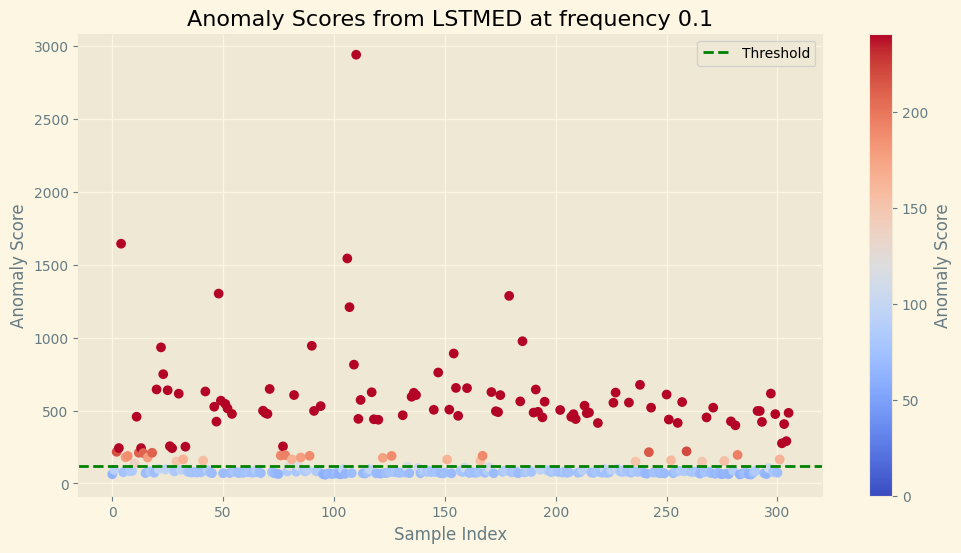

Anomalies detected: 120
Best threshold: 149.5681 | F1 Score: 0.9375 | Precision: 0.8824 | Recall: 1.0000

	-------------------------------------------------------------------------------------

Anomaly prediction completed.
Number of anomalies detected: 8 with threshold 578.6251009699746, std
Number of anomalies detected: 47 with threshold 107.98897301452254, mad
Number of anomalies detected: 9 with threshold 560.9251045486457, percentile
Number of anomalies detected: 16 with threshold 252.06606346509324, IQR
Number of anomalies detected: 164 with threshold 0.0, zero

choosen threshold type: mad, with value: 107.9890
F1 Score: 0.8537
Accuracy: 0.9268
Precision: 0.7447
Recall: 1.0000
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       129
           1       0.74      1.00      0.85        35

    accuracy                           0.93       164
   macro avg       0.87      0.95      0.90       164
weighted avg       0.95      0.93   

c:\Users\VG User\Documents\GitHub\MLinAPP-FP01-14\.venv\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


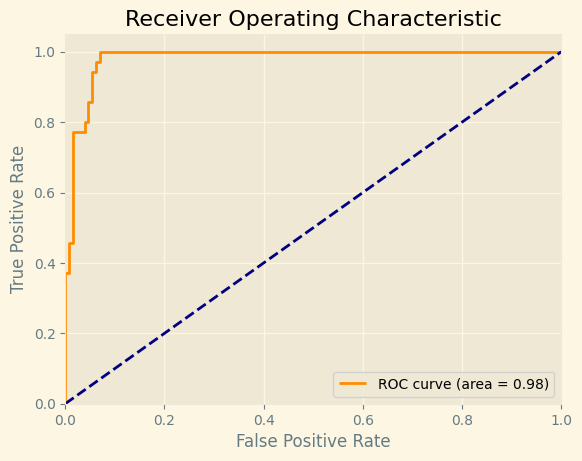

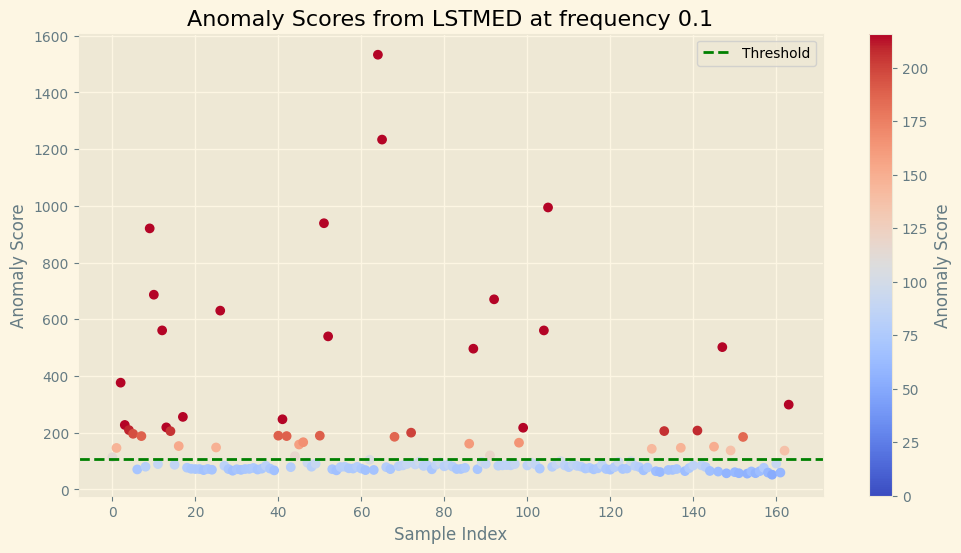

Anomalies detected: 47
Best threshold: 136.9555 | F1 Score: 0.8861 | Precision: 0.7955 | Recall: 1.0000

	-------------------------------------------------------------------------------------

Anomaly prediction completed.
Number of anomalies detected: 3 with threshold 1017.0098094394746, std
Number of anomalies detected: 38 with threshold 506.6906244612182, mad
Number of anomalies detected: 8 with threshold 680.0653164482007, percentile
Number of anomalies detected: 3 with threshold 1174.8606874113725, IQR
Number of anomalies detected: 141 with threshold 0.0, zero

choosen threshold type: mad, with value: 506.6906
F1 Score: 0.7447
Accuracy: 0.8298
Precision: 0.9211
Recall: 0.6250
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        85
           1       0.92      0.62      0.74        56

    accuracy                           0.83       141
   macro avg       0.86      0.79      0.81       141
weighted avg       0.85      0.83     

c:\Users\VG User\Documents\GitHub\MLinAPP-FP01-14\.venv\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Anomalies detected: 38
Best threshold: 409.3927 | F1 Score: 0.9167 | Precision: 0.8594 | Recall: 0.9821

	-------------------------------------------------------------------------------------



In [9]:
df_test = get_statistics(X_test, y_collisions, classifier, df_test, freq, threshold_type="mad")
df_test_1 = get_statistics(X_test_1, y_collisions_1, classifier, df_test_1, freq, threshold_type="mad")
df_test_5 = get_statistics(X_test_5, y_collisions_5, classifier, df_test_5, freq, threshold_type="mad")

In [10]:
plot_anomalies_true_and_predicted(df_collisions_raw, df_collisions_raw_action, collisions_zones, df_test, title="Collisions zones vs predicted zones for both recordings")

In [11]:
plot_anomalies_true_and_predicted(df_collisions_raw_1, df_collisions_raw_action_1, collisions_zones_1, df_test_1, title="Collisions zones vs predicted zones for recording 1")

In [12]:
plot_anomalies_true_and_predicted(df_collisions_raw_5, df_collisions_raw_action_5, collisions_zones_5, df_test_5, title="Collisions zones vs predicted zones for recording 5")